In [1]:
%matplotlib notebook
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import h5py 
import os, sys
import csv
import xlsxwriter
import numpy as np
import pandas as pd
sourcepath = '/Users/niloo/Desktop/SwissFel_2019/data_beamtime/SwissFEL_BERNINA_20181820-master/src'
sys.path.insert(0, sourcepath)
import calibrators
from calibrators import *
import integrators
from integrators import *

In [2]:
'''
with open('ice_20-50ADU_40-50mm.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(",") for line in stripped if line)
    with open('ice_20-50ADU_40-50mm.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        #writer.writerow(('title', 'intro'))
        writer.writerows(lines)
'''

'\nwith open(\'ice_20-50ADU_40-50mm.txt\', \'r\') as in_file:\n    stripped = (line.strip() for line in in_file)\n    lines = (line.split(",") for line in stripped if line)\n    with open(\'ice_20-50ADU_40-50mm.csv\', \'w\') as out_file:\n        writer = csv.writer(out_file)\n        #writer.writerow((\'title\', \'intro\'))\n        writer.writerows(lines)\n'

In [3]:
'''
list_1 = []
with open('ice_50ADU_40-50mm.txt') as f:
    text = map (lambda x : x.strip(),f.readlines())
    #lines = f.readlines()
    p = np.array([x.split() for x in text if not x.startswith('i')]).T.astype(float)
    list_1.append(p)
'''

"\nlist_1 = []\nwith open('ice_50ADU_40-50mm.txt') as f:\n    text = map (lambda x : x.strip(),f.readlines())\n    #lines = f.readlines()\n    p = np.array([x.split() for x in text if not x.startswith('i')]).T.astype(float)\n    list_1.append(p)\n"

In [4]:
#q = list_1[0][0]
#p3 = list_1[0][3]
#p4 = list_1[0][4]-80
#p5 = list_1[0][5]-150

In [5]:
'''
# add an extra row into the existing excel sheet
# read and write again
df = pd.read_excel('ice_50ADU_40-50mm_new.xlsx')
df['q'] = pd.Series(q)
df['ice_50_40p4mm_angavg_0bsubm'] = pd.Series(p3)
df['ice_50_45p6mm_angavg_0bsubm'] = pd.Series(p4)
df['ice_50_50p6mm_angavg_0bsubm'] = pd.Series(p5)

df.to_excel('New_Excel_File.xlsx')
'''

"\n# add an extra row into the existing excel sheet\n# read and write again\ndf = pd.read_excel('ice_50ADU_40-50mm_new.xlsx')\ndf['q'] = pd.Series(q)\ndf['ice_50_40p4mm_angavg_0bsubm'] = pd.Series(p3)\ndf['ice_50_45p6mm_angavg_0bsubm'] = pd.Series(p4)\ndf['ice_50_50p6mm_angavg_0bsubm'] = pd.Series(p5)\n\ndf.to_excel('New_Excel_File.xlsx')\n"

In [6]:
df = pd.read_excel('ice_20-50ADU_40-50mm.xlsx')
q1 = df['q'].values
low_40mm = df['ice_50_20_40p4mm_angavg_0bsubm'].values
low_45mm = df['ice_50_20_45p6mm_angavg_0bsubm'].values
low_50mm = df['ice_50_20_50p6mm_angavg_0bsubm'].values


In [7]:
df = pd.read_excel('ice_50ADU_40-50mm.xlsx')
q2 = df['q'].values
high_40mm = df['ice_50_40p4mm_angavg_0bsubm'].values
high_45mm = df['ice_50_45p6mm_angavg_0bsubm'].values
high_50mm = df['ice_50_50p6mm_angavg_0bsubm'].values


<IPython.core.display.Javascript object>


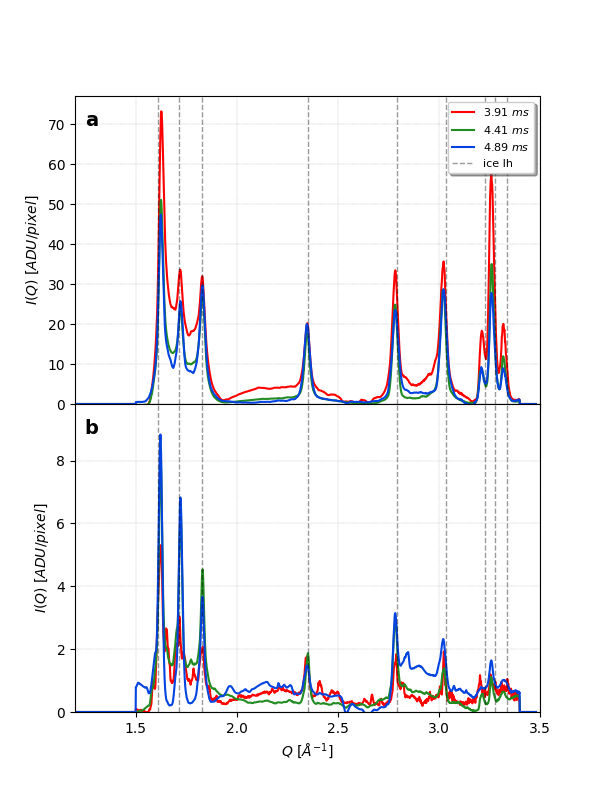

In [8]:
# peak numbers vs q_cm center of mass in q scale
fig, (ax1, ax2) = plt.subplots(2,ncols=1, sharex=True, figsize = [6,8])
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

T_229, = ax1.plot(q2, high_40mm,  color='r')
T_228, = ax1.plot(q2, high_45mm,  color='forestgreen')
T_227, = ax1.plot(q2, high_50mm,  color='#0343DF')

T_229_blw, = ax2.plot(q1, low_40mm,  color='r')
T_228_blw, = ax2.plot(q1, low_45mm,  color='forestgreen')
T_227_blw, = ax2.plot(q1, low_50mm,  color='#0343DF')

xposition = iceIh_peaks()
for x,xc in enumerate(xposition):
    ice_plot = ax1.axvline(x=xc, color='k', lw = 1, linestyle='--', alpha=0.4)
    #plt_fill = ax1.axvspan(xc-0.05, xc+0.05, alpha=0.15, color='gray')
    ice_plot2 = ax2.axvline(x=xc, color='k', lw = 1, linestyle='--', alpha=0.4)
    #plt_fill2 = ax2.axvspan(xc-0.05, xc+0.05, alpha=0.15, color='gray')


ax1.legend(handles=[T_229, T_228, T_227, ice_plot], labels=['$3.91\ ms$', '$4.41\ ms$', '$4.89\ ms$', 'ice Ih'], loc='upper right', prop={'size': 8}, fancybox=True, framealpha=1, shadow=True, borderpad=0.4)
ax1.set_xlabel('$Q\ [\AA^{-1}]$')
ax1.text(0.05, 0.95, 'a', transform=ax1.transAxes, fontsize=14, fontweight='bold', va='top', ha='right')
ax1.set_ylabel('$I(Q)\ [ADU/pixel]$')
ax1.set_xlim(1.2, 3.5)
ax1.set_ylim(0, 77)
#plt.title('Above 50 ADUs')
ax1.grid(c = 'grey',linestyle=':', linewidth=0.3)

#ax2.legend(handles=[T_227_blw, T_228_blw, T_229_blw, ice_plot2], labels=['50 mm', '45 mm', '40 mm', 'ice Ih'], loc='upper right', prop={'size': 8}, fancybox=True, framealpha=1, shadow=True, borderpad=0.4)
ax2.set_xlabel('$Q\ [\AA^{-1}]$')
ax2.text(0.05, 0.95, 'b', transform=ax2.transAxes, fontsize=14, fontweight='bold', va='top', ha='right')
#plt.ylabel('$fraction$ $of$ $peaks\ (\%)$')
#plt.ylabel('$Number$ $of$ $peaks$')
ax2.set_ylabel('$I(Q)\ [ADU/pixel]$')
ax2.set_xlim(1.2, 3.5)
ax2.set_ylim(0, 9.8)
#plt.title('Above 50 ADUs')
ax2.grid(c = 'grey',linestyle=':', linewidth=0.3)
#ax1.set_rasterized(True)
#ax2.set_rasterized(True)
#ax1.set_rasterization_zorder(1)
#ax2.set_rasterization_zorder(1)
plt.savefig('/Users/niloo/Desktop/LCLS/14Dec2020/LCLS_files/LCLS_plots/Fig2.pdf', format='pdf')
#plt.savefig('/Users/niloo/Desktop/LCLS/14Dec2020/LCLS_files/LCLS_plots/Fig3.eps', format='eps', rasterized=True)
plt.show() 

<IPython.core.display.Javascript object>


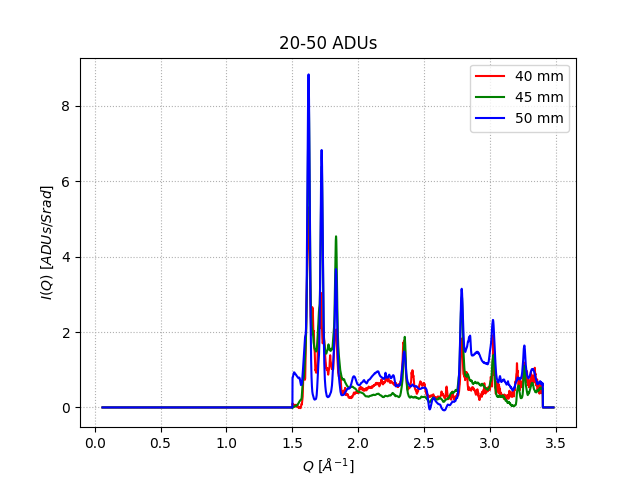

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [9]:
# plot q2
plt.figure()

plt.plot(q1, low_40mm, 'r', label= '40 mm')
plt.plot(q1, low_45mm, 'g', label= '45 mm')
plt.plot(q1, low_50mm, 'b', label= '50 mm')
plt.xlabel('$Q\ [\AA^{-1}]$')
plt.ylabel('$I(Q)\ [ADUs/Srad]$')
#plt.axhline(0,c='black',lw=1)
#plt.xlim(170,310)
#plt.ylim(2.9,3.05)
plt.legend(loc='upper right', prop={'size': 10})
plt.grid(linestyle='dotted')
plt.title('20-50 ADUs')
plt.savefig('20-50ADU.eps', format='eps')
plt.show()

<IPython.core.display.Javascript object>


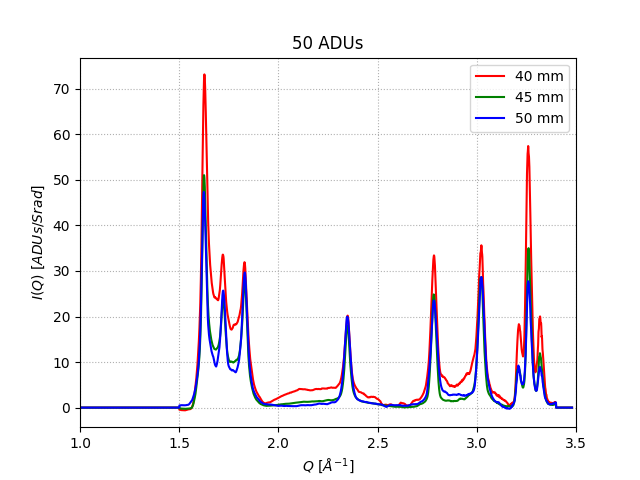

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [10]:
# plot q2
plt.figure()

plt.plot(q2, high_40mm, 'r', label= '40 mm')
plt.plot(q2, high_45mm, 'g', label= '45 mm')
plt.plot(q2, high_50mm, 'b', label= '50 mm')
plt.xlabel('$Q\ [\AA^{-1}]$')
plt.ylabel('$I(Q)\ [ADUs/Srad]$')
#plt.axhline(0,c='black',lw=1)
plt.xlim(1.,3.5)
#plt.ylim(2.9,3.05)
plt.legend(loc='upper right', prop={'size': 10})
plt.grid(linestyle='dotted')
plt.title('50 ADUs')
plt.savefig('50ADU.eps', format='eps')
plt.show()

In [11]:
# binsize = 0.1 or 0.2
def downsample(x, y, size=int(2)):
    assert (len(x) == len(y))
    if (len(x)%size != 0):
        print('WARNING: size of %d in input arrays are not dividable with %d, remainder: %d' % (len(x), size, len(x)%size))
    n = np.int(np.ceil(len(x)/size))
    new_x = np.zeros(n)
    new_y = np.zeros(n)
    for i in range(n):
        new_x[i] = np.average(x[i*size:(i+1)*size])
        new_y[i] = np.sum(y[i*size:(i+1)*size])
    return new_x, new_y


In [12]:
df = pd.read_excel('hexagonal_planes.xlsx', sheet_name = 'hexagonal_ice')
hkl = df['hkl'].values
q_val = df['q (A-1)'].values

In [13]:
df = pd.read_excel('cubic_planes.xlsx', sheet_name = 'cubic_ice')
hkl_sc = df['hkl'].values
q_sc = df['q (A-1)'].values

In [14]:
df = pd.read_excel('cubic_planes1.xlsx', sheet_name = 'cubic_ice')
hkl_sc1 = df['hkl'].values
q_sc1 = df['q (A-1)'].values
qsc_list1 = np.array([q_sc1[i] for i in range(len(q_sc1)) if (q_sc1[i] <= 3.5)])

In [15]:
q_list = np.array([q_val[i] for i in range(len(q_val)) if (q_val[i] <= 3.5)])

In [16]:
qsc_list = np.array([q_sc[i] for i in range(len(q_sc)) if (q_sc[i] <= 3.5)])

<IPython.core.display.Javascript object>


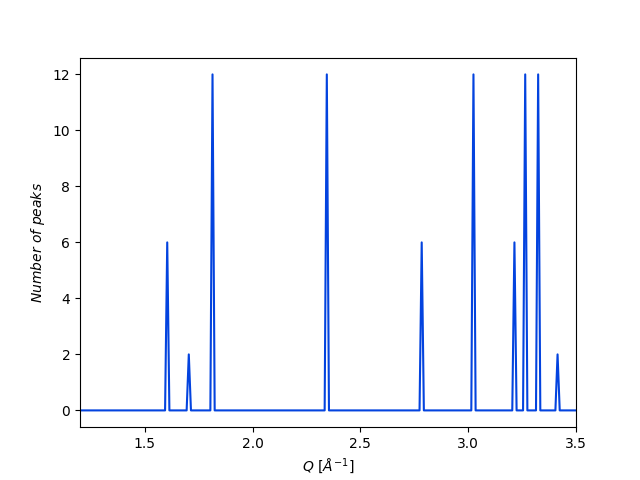

In [17]:
plt.figure()
binwidth = 0.001
binedges = np.arange(0-binwidth/2,5.0+3*binwidth/2,binwidth)
yhist, bin_edges = np.histogram(q_list, bins=binedges)
bin_centers = np.array([(bin_edges[i] + bin_edges[i+1])/2 for i in range(len(bin_edges)-1)])
new_bins1, new_q1 = downsample(bin_centers, yhist, size=10)
plt.plot(new_bins1, new_q1,  color='#0343DF')
plt.xlim(1.2, 3.5)
plt.ylabel('$Number\ of\ peaks$')
plt.xlabel('$Q\ [\AA^{-1}]$')
plt.show()

In [18]:
yhist1, bin_edges1 = np.histogram(qsc_list1, bins=binedges)
bin_centers1 = np.array([(bin_edges1[i] + bin_edges1[i+1])/2 for i in range(len(bin_edges1)-1)])
new_bins2, new_q2 = downsample(bin_centers1, yhist1, size=10)

<IPython.core.display.Javascript object>


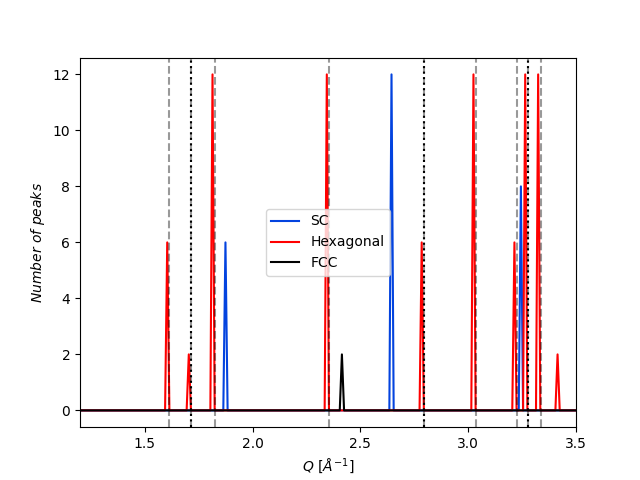

In [19]:
plt.figure()
binwidth = 0.001
binedges = np.arange(0-binwidth/2,5.0+3*binwidth/2,binwidth)
yhist, bin_edges = np.histogram(qsc_list, bins=binedges)
bin_centers = np.array([(bin_edges[i] + bin_edges[i+1])/2 for i in range(len(bin_edges)-1)])
new_bins, new_q = downsample(bin_centers, yhist, size=10)
plt.plot(new_bins, new_q,  color='#0343DF', label='SC')
plt.plot(new_bins1, new_q1,  color='r', label= 'Hexagonal')
plt.plot(new_bins2, new_q2,  color='k', label='FCC')
xposition_Ih = iceIh_peaks()
xposition_Ic = iceIc_peaks()
for x,xc in enumerate(xposition_Ih):
    plt.axvline(x=xc, color='k', linestyle='--', alpha=0.4)
    
for x,xc in enumerate(xposition_Ic):
    plt.axvline(x=xc, color='k', linestyle=':')
    
plt.xlim(1.2, 3.5)
plt.legend()
plt.ylabel('$Number\ of\ peaks$')
plt.xlabel('$Q\ [\AA^{-1}]$')
#plt.title('$FCC\ cubic$')
plt.show()

In [20]:
df = pd.read_excel('/Users/niloo/Desktop/LCLS/14Dec2020/data_fig3a.xlsx')
q_cm_abv = df['q_cm'].values
P_w_abv = df['P_w'].values
P_m_abv = df['P_m'].values
P_c_abv = df['P_c'].values

In [21]:
df = pd.read_excel('/Users/niloo/Desktop/LCLS/14Dec2020/data_fig3b.xlsx')
q_cm_blw = df['q_cm'].values
P_w_blw = df['P_w'].values
P_m_blw = df['P_m'].values
P_c_blw = df['P_c'].values

<IPython.core.display.Javascript object>


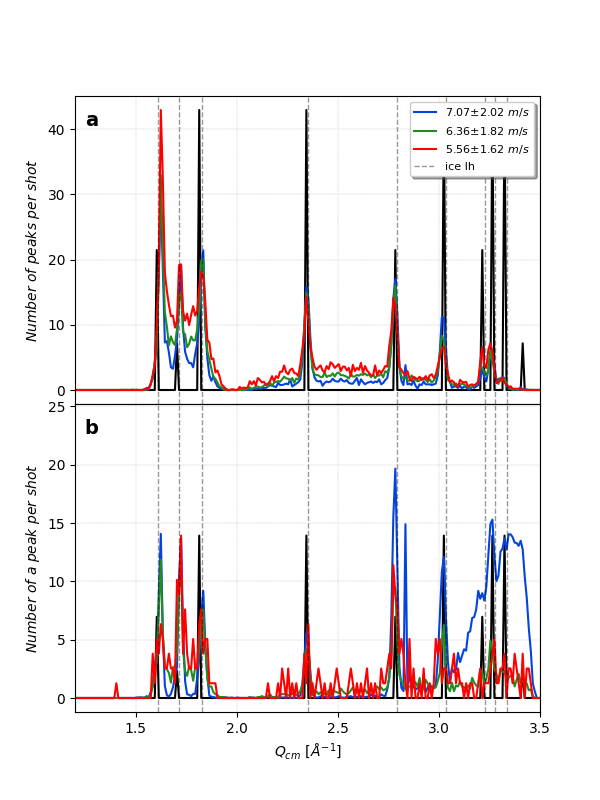

In [22]:
# peak numbers vs q_cm center of mass in q scale
fig, (ax1, ax2) = plt.subplots(2,ncols=1, sharex=True, figsize = [6,8])
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

ax1.plot(new_bins1, new_q1/max(new_q1)*max(P_w_abv),  color='k', label= 'Hexagonal')
ax2.plot(new_bins1, new_q1/max(new_q1)*max(P_w_blw),  color='k', label= 'Hexagonal')
    
T_227, = ax1.plot(q_cm_abv, P_c_abv,  color='#0343DF')
T_228, = ax1.plot(q_cm_abv, P_m_abv,  color='forestgreen')
T_229, = ax1.plot(q_cm_abv, P_w_abv,  color='r')

T_227_blw, = ax2.plot(q_cm_blw, P_c_blw,  color='#0343DF')
T_228_blw, = ax2.plot(q_cm_blw, P_m_blw,  color='forestgreen')
T_229_blw, = ax2.plot(q_cm_blw, P_w_blw,  color='r')

xposition = iceIh_peaks()
for x,xc in enumerate(xposition):
    ice_plot = ax1.axvline(x=xc, color='k', linestyle='--', lw=1, alpha=0.4)
    #plt_fill = ax1.axvspan(xc-0.05, xc+0.05, alpha=0.15, color='gray')
    ice_plot2 = ax2.axvline(x=xc, color='k', linestyle='--', lw=1, alpha=0.4)
    #plt_fill2 = ax2.axvspan(xc-0.05, xc+0.05, alpha=0.15, color='gray')
    
ax1.legend(handles=[T_227, T_228, T_229, ice_plot], labels=['$7.07±2.02\ m/s$', '$6.36±1.82\ m/s$', '$5.56±1.62\ m/s$', 'ice Ih'], loc='upper right', prop={'size': 8}, fancybox=True, framealpha=1, shadow=True, borderpad=0.4)
ax1.set_xlabel('$Q_{cm}\ [\AA^{-1}]$')
ax1.text(0.05, 0.95, 'a', transform=ax1.transAxes, fontsize=14, fontweight='bold', va='top', ha='right')
ax1.set_ylabel('$Number\ of\ peaks\ per\ shot$')
ax1.set_xlim(1.2, 3.5)
#ax1.set_ylim(0, 46)
#plt.title('Above 50 ADUs')
ax1.grid(c = 'grey',linestyle=':', linewidth=0.3)

#ax2.legend(handles=[T_227_blw, T_228_blw, T_229_blw, ice_plot2], labels=['50 mm', '45 mm', '40 mm', 'ice Ih'], loc='upper right', prop={'size': 8}, fancybox=True, framealpha=1, shadow=True, borderpad=0.4)
ax2.set_xlabel('$Q_{cm}\ [\AA^{-1}]$')
ax2.text(0.05, 0.95, 'b', transform=ax2.transAxes, fontsize=14, fontweight='bold', va='top', ha='right')
#plt.ylabel('$fraction$ $of$ $peaks\ (\%)$')
#plt.ylabel('$Number$ $of$ $peaks$')
ax2.set_ylabel('$Number\ of\ a\ peak\ per\ shot$')
ax2.set_xlim(1.2, 3.5)
#ax2.set_ylim(0, 23)
#plt.title('Above 50 ADUs')
ax2.grid(c = 'grey',linestyle=':', linewidth=0.3)
#ax1.set_rasterized(True)
#ax2.set_rasterized(True)
#ax1.set_rasterization_zorder(1)
#ax2.set_rasterization_zorder(1)
plt.savefig('/Users/niloo/Desktop/LCLS/14Dec2020/LCLS_files/LCLS_plots/Fig3_alternative.pdf', format='pdf')
#plt.savefig('/Users/niloo/Desktop/LCLS/14Dec2020/LCLS_files/LCLS_plots/Fig3.eps', format='eps', rasterized=True)
plt.show() 

In [23]:
new_bins1[np.where(new_q1 > 0)]

array([1.6045, 1.7045, 1.8145, 2.3445, 2.7845, 3.0245, 3.2145, 3.2645,
       3.3245, 3.4145])

In [24]:
q_scale(91, photon_energy=9500, detector_distance=0.13850000000000004, pixel_size=109.92E-6)

0.3470228079046663

In [25]:
3.1717141451477797 - 3.169501459231359

0.0022126859164206536

In [26]:
0.3470228079046663 - 0.34322397484922956

0.0037988330554367122

In [27]:
# I normalized to the area in the region up to 3.1 Å-1

In [28]:
def q_calculation(theta, wavelength = 1.5418):
    radian = theta*(np.pi/180)
    # convert to momentum transfer in A-1
    q = 4.*np.pi*np.sin(radian/2)/(wavelength)
    return q

In [29]:
theta_range = np.arange(10,90.02,0.02)
q_arr = q_calculation(theta_range)

In [30]:
theta_range = np.arange(10,90,10)

In [37]:
# read dat to a list of lists
datContent = [i.strip().split() for i in open('Ih_FAULTS_1090_9010.dat').readlines() if not i.startswith('!')]

datContent_8020_9010 = [i.strip().split() for i in open('Ih_FAULTS_8020_9010.dat').readlines() if not i.startswith('!')]
datContent_8020_8515 = [i.strip().split() for i in open('Ih_FAULTS_8020_8515.dat').readlines() if not i.startswith('!')]
datContent_2080_9010 = [i.strip().split() for i in open('Ih_FAULTS_2080_9010.dat').readlines() if not i.startswith('!')]
datContent_1000_0100 = [i.strip().split() for i in open('Ih_FAULTS_1000_0100.dat').readlines() if not i.startswith('!')]
datContent_0100_1000 = [i.strip().split() for i in open('Ih_FAULTS_0100_1000.dat').readlines() if not i.startswith('!')]

In [38]:
concat_q = np.concatenate(datContent[2:])
arr_of_data = np.array([float(i) for i in concat_q])

concat_q_8020_9010 = np.concatenate(datContent_8020_9010[2:])
arr_of_data_8020_9010 = np.array([float(i) for i in concat_q_8020_9010])

concat_q_8020_8515 = np.concatenate(datContent_8020_8515[2:])
arr_of_data_8020_8515 = np.array([float(i) for i in concat_q_8020_8515])

concat_q_2080_9010 = np.concatenate(datContent_2080_9010[2:])
arr_of_data_2080_9010 = np.array([float(i) for i in concat_q_2080_9010])

concat_q_1000_0100 = np.concatenate(datContent_1000_0100[2:])
arr_of_data_1000_0100 = np.array([float(i) for i in concat_q_1000_0100])

concat_q_0100_1000 = np.concatenate(datContent_0100_1000[2:])
arr_of_data_0100_1000 = np.array([float(i) for i in concat_q_0100_1000])

In [39]:
area = np.trapz(arr_of_data[np.where(q_arr <= 3.1)], dx=0.02)
area_exp = np.trapz(high_50mm[np.where(q2 <= 3.1)], dx=0.001)

In [40]:
q_arr

array([0.71035891, 0.71177601, 0.71319308, ..., 5.76122948, 5.76223562,
       5.76324159])

<IPython.core.display.Javascript object>


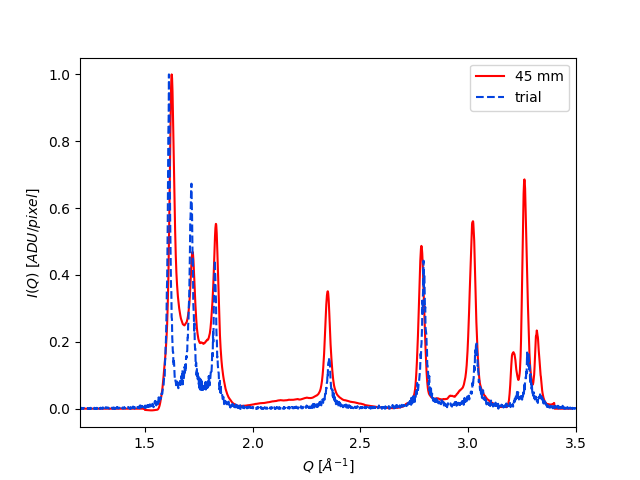

In [41]:
plt.figure()
plt.plot(q2, high_45mm/max(high_45mm), 'r', label= '45 mm')
plt.plot(q_arr, (arr_of_data_8020_9010*0.6+arr_of_data_0100_1000*0.4)/max(arr_of_data_8020_9010*0.6+arr_of_data_0100_1000*0.4), color='#0343DF', ls='--', label='trial')
plt.xlim(1.2, 3.5)
plt.legend(loc='upper right', prop={'size': 10})
plt.ylabel('$I(Q)\ [ADU/pixel]$')
plt.xlabel('$Q\ [\AA^{-1}]$')
plt.savefig('/Users/niloo/Desktop/LCLS/14Dec2020/trial_45mm.png', format='png')
plt.show()

In [42]:
#max(arr_of_data_0100_1000[np.where((q_arr> 1.81) & (q_arr < 1.84))])
max(arr_of_data_1000_0100)

1409.0

<IPython.core.display.Javascript object>


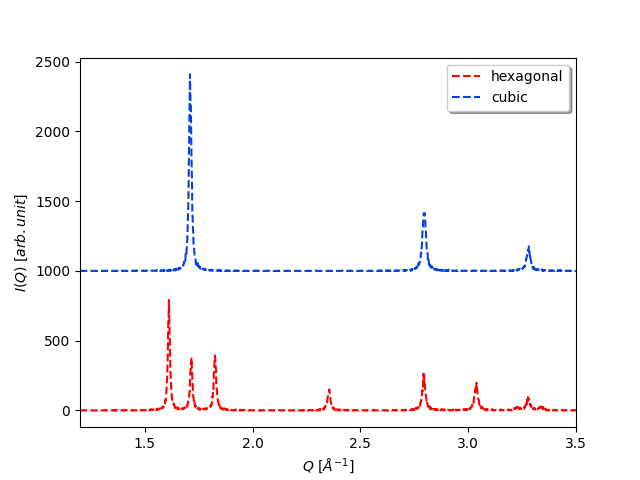

In [43]:
plt.figure()
plt.plot(q_arr, arr_of_data_0100_1000, 'r',  ls='--', label= 'hexagonal')
plt.plot(q_arr, arr_of_data_1000_0100+1000, color='#0343DF', ls='--', label='cubic')
plt.xlim(1.2, 3.5)
plt.legend(loc='upper right', prop={'size': 10}, fancybox=True, framealpha=1, shadow=True, borderpad=0.4)
plt.ylabel('$I(Q)\ [arb. unit]$')
plt.xlabel('$Q\ [\AA^{-1}]$')
plt.savefig('/Users/niloo/Desktop/LCLS/14Dec2020/plot_Ih_Ic.pdf', format='pdf')
plt.show()

<IPython.core.display.Javascript object>


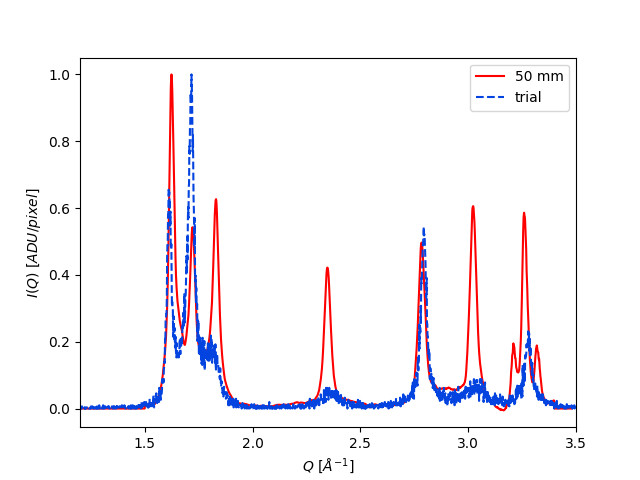

In [44]:
plt.figure()
plt.plot(q2, high_50mm/max(high_50mm), 'r', label= '50 mm')
plt.plot(q_arr, arr_of_data_8020_8515/max(arr_of_data_8020_8515), color='#0343DF', ls='--', label='trial')
plt.xlim(1.2, 3.5)
plt.legend(loc='upper right', prop={'size': 10})
plt.ylabel('$I(Q)\ [ADU/pixel]$')
plt.xlabel('$Q\ [\AA^{-1}]$')
plt.savefig('/Users/niloo/Desktop/LCLS/14Dec2020/trial_50mm.png', format='png')
plt.show()

In [45]:
0.482936*378/max(arr_of_data_1000_0100) 

0.12955983534421575

<IPython.core.display.Javascript object>


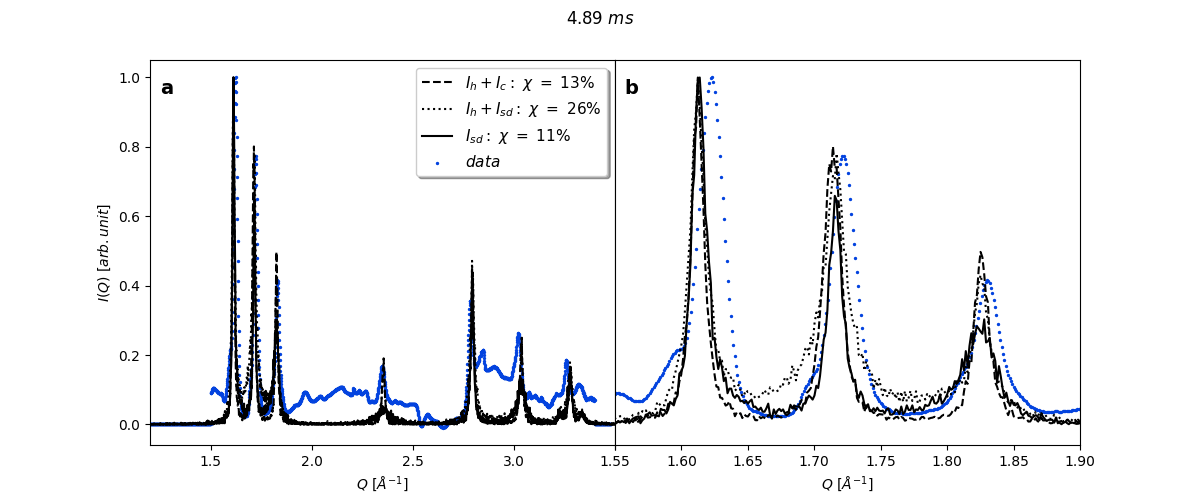

In [47]:
# plot for the cold T 4.89 ms (blue)
# Files for Ic+Ih
fig, (ax1, ax2) = plt.subplots(1,ncols=2, figsize = [12,5])

IH_IC = 0.482936*arr_of_data_1000_0100*378/max(arr_of_data_1000_0100) + (1-0.482936)*arr_of_data_0100_1000
ax1.plot(q_arr, IH_IC/max(IH_IC), color='k', ls='--', label= '$I_h+I_c:\ \chi\ =\ 13\%$')
ax1.scatter(q2, low_50mm/max(low_50mm), color='#0343DF', s=2, label = '$data$')

IH_ISD = (arr_of_data_8020_8515*0.61+arr_of_data_0100_1000*0.39)/max(arr_of_data_8020_8515*0.61+arr_of_data_0100_1000*0.39)
ax1.plot(q_arr, IH_ISD/max(IH_ISD), 'k:', label = '$I_h+I_{sd}:\ \chi\ =\ 26\%$')
ax1.plot(q_arr, arr_of_data_2080_9010/max(arr_of_data_2080_9010), 'k-', label='$I_{sd}:\ \chi\ =\ 11\%$')


ax1.set_xlim(1.2, 3.5)
ax1.set_ylabel('$I(Q)\ [arb. unit]$')
ax1.set_xlabel('$Q\ [\AA^{-1}]$')
x_ticks = ax1.xaxis.get_major_ticks()
x_ticks[-1].label1.set_visible(False) ## set last x tick label invisible
ax1.legend(loc='upper right', prop={'size': 11}, fancybox=True, framealpha=1, shadow=True, borderpad=0.4)
plt.suptitle('$4.89\ ms$')


ax2.plot(q_arr, IH_IC/max(IH_IC), color='k', ls='--', label= '$I_h+I_c:\ cubicity\ =\ 13\%$')
ax2.scatter(q2, low_50mm/max(low_50mm), color='#0343DF', s=2, label = '$data$')
ax2.plot(q_arr, IH_ISD/max(IH_ISD), 'k:', label = '$I_h+I_{sd}:\ cubicity\ =\ 26\%$')
ax2.plot(q_arr, arr_of_data_2080_9010/max(arr_of_data_2080_9010), 'k-', label='$I_{sd}:\ cubicity\ =\ 11\%$')

ax2.set_xlim(1.55, 1.9)
#ax2.set_ylabel('$I(Q)\ [ADU/pixel]$')
ax2.set_xlabel('$Q\ [\AA^{-1}]$')
plt.subplots_adjust(wspace=0, hspace=0)
ax2.axes.yaxis.set_visible(False)
ax1.text(0.05, 0.95, 'a', transform=ax1.transAxes, fontsize=14, fontweight='bold', va='top', ha='right')
ax2.text(0.05, 0.95, 'b', transform=ax2.transAxes, fontsize=14, fontweight='bold', va='top', ha='right')

#ax2.legend(loc='upper right', prop={'size': 10}, fancybox=True, framealpha=1, shadow=True, borderpad=0.4)

plt.savefig('/Users/niloo/Desktop/LCLS/14Dec2020/Ic+Ih_50mm.pdf', format='pdf')
plt.show()

In [48]:
0.317298*378/max(arr_of_data_1000_0100)

0.08512323917672109

<IPython.core.display.Javascript object>


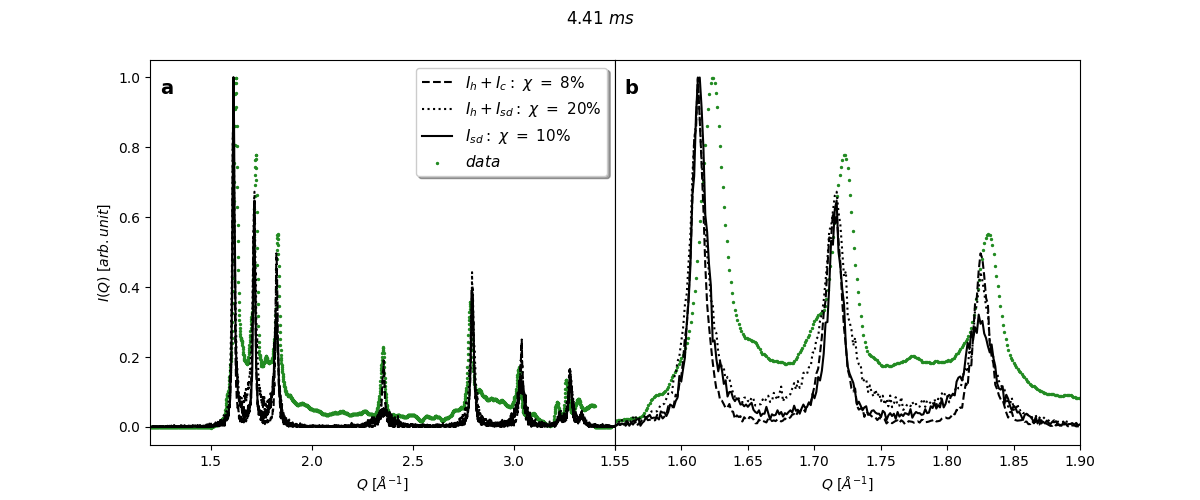

In [49]:
# plot for the cold T 4.41 ms (green)
# Files for Ic+Ih
# Pure Isd 
# Ih+Isd
fig, (ax1, ax2) = plt.subplots(1,ncols=2, figsize = [12,5])

IH_IC = 0.317298*arr_of_data_1000_0100*378/max(arr_of_data_1000_0100) + (1-0.317298)*arr_of_data_0100_1000
ax1.plot(q_arr, IH_IC/max(IH_IC), color='k', ls='--', label = '$I_h+I_{c}:\ \chi\ =\ 8\%$')
ax1.scatter(q2, low_45mm/max(low_45mm), color='forestgreen', s=2, label = '$data$')
IH_ISD = (arr_of_data_8020_9010*0.6+arr_of_data_0100_1000*0.4)/max(arr_of_data_8020_9010*0.6+arr_of_data_0100_1000*0.4)
ax1.plot(q_arr, IH_ISD/max(IH_ISD), 'k:', label = '$I_h+I_{sd}:\ \chi\ =\ 20\%$')
ax1.plot(q_arr, arr_of_data/max(arr_of_data), 'k-', label='$I_{sd}:\ \chi\ =\ 10\%$')

ax1.set_xlim(1.2, 3.5)
x_ticks = ax1.xaxis.get_major_ticks()
x_ticks[-1].label1.set_visible(False) ## set last x tick label invisible
ax1.set_ylabel('$I(Q)\ [arb. unit]$')
ax1.set_xlabel('$Q\ [\AA^{-1}]$')
plt.suptitle('$4.41\ ms$')
ax1.legend(loc='upper right', prop={'size': 11}, fancybox=True, framealpha=1, shadow=True, borderpad=0.4)

ax2.plot(q_arr, IH_IC/max(IH_IC), color='k', ls='--', label = '$I_h+I_{c}:\ \chi\ =\ 8\%$')
ax2.scatter(q2, low_45mm/max(low_45mm), color='forestgreen', s=2, label = '$data$')
ax2.plot(q_arr, IH_ISD/max(IH_ISD), 'k:', label = '$I_h+I_{sd}:\ \chi\ =\ 20\%$')
ax2.plot(q_arr, arr_of_data/max(arr_of_data), 'k-', label='$I_{sd}:\ \chi\ =\ 10\%$')

ax2.set_xlim(1.55, 1.9)
#ax2.set_ylabel('$I(Q)\ [ADU/pixel]$')
ax2.set_xlabel('$Q\ [\AA^{-1}]$')
plt.subplots_adjust(wspace=0, hspace=0)
ax2.axes.yaxis.set_visible(False)
ax1.text(0.05, 0.95, 'a', transform=ax1.transAxes, fontsize=14, fontweight='bold', va='top', ha='right')
ax2.text(0.05, 0.95, 'b', transform=ax2.transAxes, fontsize=14, fontweight='bold', va='top', ha='right')


plt.savefig('/Users/niloo/Desktop/LCLS/14Dec2020/Ic+Ih_45mm.pdf', format='pdf')
plt.show()

In [50]:
0.345441*378/max(arr_of_data_1000_0100)*100

9.26733129879347

<IPython.core.display.Javascript object>


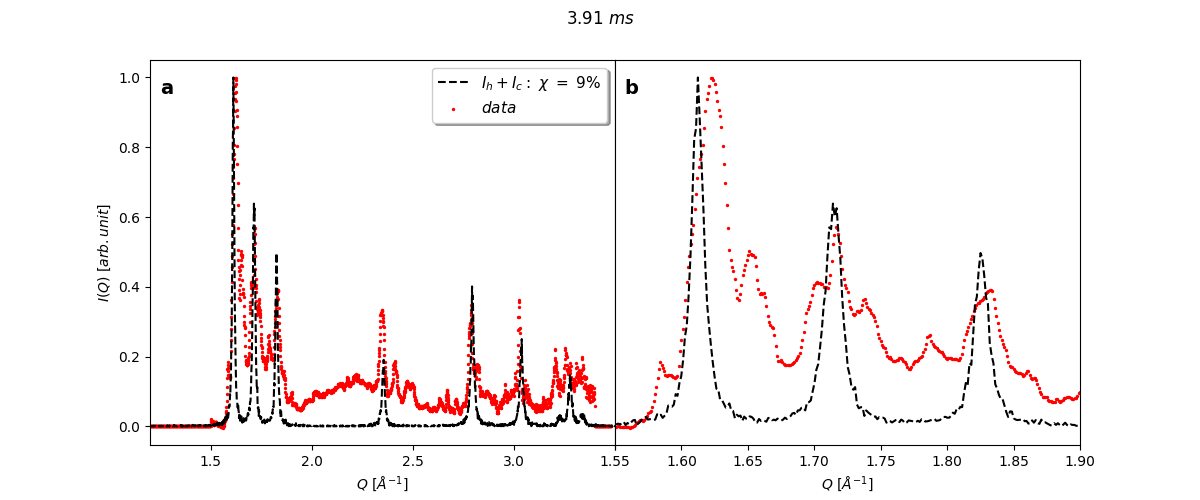

In [51]:
# plot for the cold T 4.41 ms (green)
# Files for Ic+Ih
# Pure Isd 
# Ih+Isd
fig, (ax1, ax2) = plt.subplots(1,ncols=2, figsize = [12,5])

IH_IC = 0.345441*arr_of_data_1000_0100*378/max(arr_of_data_1000_0100) + (1-0.345441)*arr_of_data_0100_1000
ax1.plot(q_arr, IH_IC/max(IH_IC), color='k', ls='--', label = '$I_h+I_{c}:\ \chi\ =\ 9\%$')
ax1.scatter(q2, low_40mm/max(low_40mm), color='r', s=2, label = '$data$')

ax1.set_xlim(1.2, 3.5)
x_ticks = ax1.xaxis.get_major_ticks()
x_ticks[-1].label1.set_visible(False) ## set last x tick label invisible
ax1.set_ylabel('$I(Q)\ [arb. unit]$')
ax1.set_xlabel('$Q\ [\AA^{-1}]$')
plt.suptitle('$3.91\ ms$')
ax1.legend(loc='upper right', prop={'size': 11}, fancybox=True, framealpha=1, shadow=True, borderpad=0.4)

ax2.plot(q_arr, IH_IC/max(IH_IC), color='k', ls='--', label = '$I_h+I_{c}:\ \chi\ =\ 8\%$')
ax2.scatter(q2, low_40mm/max(low_40mm), color='r', s=2, label = '$data$')

ax2.set_xlim(1.55, 1.9)
#ax2.set_ylabel('$I(Q)\ [ADU/pixel]$')
ax2.set_xlabel('$Q\ [\AA^{-1}]$')
plt.subplots_adjust(wspace=0, hspace=0)
ax2.axes.yaxis.set_visible(False)
ax1.text(0.05, 0.95, 'a', transform=ax1.transAxes, fontsize=14, fontweight='bold', va='top', ha='right')
ax2.text(0.05, 0.95, 'b', transform=ax2.transAxes, fontsize=14, fontweight='bold', va='top', ha='right')


plt.savefig('/Users/niloo/Desktop/LCLS/14Dec2020/Ic+Ih_40mm.pdf', format='pdf')
plt.show()